In [1]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
eyetraindf = pd.read_csv('/content/gdrive/My Drive/tesis/eyepacs/trainLabels.csv')
eyetraindf1 = eyetraindf[eyetraindf.image != '43862_left']

In [5]:
eyetraindf1

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
ytrain1[35124]

In [ ]:
eyetraindf1.loc[34715]

image    43862_right
level              0
Name: 34715, dtype: object

In [ ]:
ytrain1 = pd.get_dummies(eyetraindf1['level']).values

In [ ]:
xtrain1 = np.load('/content/gdrive/My Drive/tesis/eyepacs/xtrainchf.npy')

In [ ]:
print(xtrain1.shape)
print(ytrain1.shape)


(35125, 224, 224, 3)
(35125, 5)


In [ ]:
from sklearn.model_selection import train_test_split

x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
    xtrain1, ytrain1, 
    test_size=0.4489110, 
    random_state=2020
)

In [ ]:
print(x_train_1.shape)
print(x_train_2.shape)
print(y_train_1.shape)
print(y_train_2.shape)

(19357, 224, 224, 3)
(15768, 224, 224, 3)
(19357, 5)
(15768, 5)


In [ ]:
x_train_1= 0
x_train_2= 0
y_train_1 = 0
y_train_2 = 0

In [ ]:
x_train_1 = 0
y_train_1 = 0

In [ ]:
old_data = eyetraindf1

In [ ]:
new_data = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
old_data = pd.read_csv('/content/gdrive/My Drive/tesis/eyepacs/trainLabels.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/test.csv')

old_data = old_data[['image', 'level']]
old_data.columns = new_data.columns
new_data['data'] = 'new'
old_data['data'] = 'old'
old_data["id_code"] = old_data["id_code"].apply(lambda x: x + ".jpeg")
new_data["id_code"] = new_data["id_code"].apply(lambda x: x + ".png")
test_df["id_code"] = test_df["id_code"].apply(lambda x: x + ".png")

# Sample rows of diagnosis = 0
diag_0 = old_data[old_data['diagnosis'] == 0].sample(frac=0.25, random_state=seed)
diag_oth = old_data[old_data['diagnosis'] != 0]
old_data = diag_0.append(diag_oth)

train_df = new_data.append(old_data)
print('Number of train samples: ', train_df.shape[0])
print('Number of test samples: ', test_df.shape[0])
display(train_df.head())


Number of train samples:  19430
Number of test samples:  1928


,id_code,diagnosis,data
0,000c1434d8d7.png,2,new
1,001639a390f0.png,4,new
2,0024cdab0c1e.png,1,new
3,002c21358ce6.png,0,new
4,005b95c28852.png,0,new


In [ ]:
xoldindex = np.array(old_data.index)


In [ ]:
xnewindex = np.array(new_data.index)

In [ ]:
xoldindex.shape

(15768,)

In [ ]:
old_data

,id_code,diagnosis,data
32132,40576_left.jpeg,0,old
26166,33112_left.jpeg,0,old
25243,31961_right.jpeg,0,old
2010,2515_left.jpeg,0,old
31965,40364_right.jpeg,0,old
...,...,...,...
35098,44323_left.jpeg,1,old
35099,44323_right.jpeg,1,old
35105,44328_right.jpeg,1,old
35112,44337_left.jpeg,1,old


In [ ]:
print(xtrain2.shape)
print(ytrain2.shape)

In [ ]:
xtrain2 = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')

In [ ]:
aptos = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
aptos
ytrain2=pd.get_dummies(aptos['diagnosis']).values

In [ ]:
x_old = np.empty((15768,224,224,3),dtype='uint8')
y_old = np.empty((15768,5),dtype='uint8')

for i in range(len(x_old)):
  if xoldindex[i] < 34714:
    x_old[i] = xtrain1[xoldindex[i]]
    y_old[i] = ytrain1[xoldindex[i]]

  elif xoldindex[i] >=  34714:
    x_old[i] = xtrain1[xoldindex[i]-1]
    y_old[i] = ytrain1[xoldindex[i]-1]

In [ ]:
xtrain2.shape

(3662, 224, 224, 3)

In [ ]:
xtrain1 = np.concatenate((x_train_2,xtrain2))

In [ ]:
ytrain1 = np.concatenate((y_train_2,ytrain2))

In [ ]:
xtrain1.shape

In [ ]:
ytrain1.shape

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_train2, y_train1, y_train2 = train_test_split(
    x_train_2, y_train_2, 
    test_size=0.20, 
    random_state=2020
)

In [ ]:
print(x_train1.shape)
print(x_train2.shape)

(12614, 224, 224, 3)
(3154, 224, 224, 3)


In [4]:
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [5]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [6]:
pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)


In [7]:
import efficientnet.keras as efn 

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,GlobalMaxPooling2D,Dropout,Dense,Activation, concatenate
from keras import applications
from keras import optimizers,Model,Sequential

In [ ]:
vdata_gen =  val_datagen.flow(x_train2, y_train2, batch_size=BATCH_SIZE, seed=2020)
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)

In [ ]:
STEP_SIZE_TRAIN = len(x_train2)//BATCH_SIZE
STEP_SIZE_VALID = len(x_val1)//BATCH_SIZE

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
def multiple_outputs(generator,X, Y, batch_size):
    gen = generator.flow(X, Y, batch_size=batch_size, seed=2020)
    
    mlb = MultiLabelBinarizer(classes = range(5))
    
    while True:
        gnext = gen.next()
        yield gnext[0], [np.argmax(gnext[1],axis = -1),gnext[1],mlb.fit_transform([list(range(x+1)) for x in np.argmax(gnext[1],axis = -1)])]

In [ ]:
train_generator = multiple_outputs(generator = train_datagen, X=x_train1, Y=y_train1,
                                   batch_size=BATCH_SIZE)
     
valid_generator = multiple_outputs(generator = val_datagen , X=x_train2,Y=y_train2,
                                   batch_size=BATCH_SIZE)

In [11]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights='imagenet',include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x1 = GlobalAveragePooling2D()(base_model.output)
    x1 = BatchNormalization()(x1)

    x2 = GlobalMaxPooling2D()(base_model.output)
    x2 = BatchNormalization()(x2)

    x = concatenate([x1,x2])

# Regression Head
    xr = Dense(2048, activation='relu')(x)
    xr = Dropout(0.5)(xr)
    xr = Dense(1,activation = 'linear',name = 'regression_output')(xr)

# Classification Head
    xc = Dense(2048, activation='relu')(x)
    xc = Dropout(0.5)(xc)
    xc = Dense(5,activation = 'softmax',name = 'classification_output')(xc)

# Ordinal Regression Head
    xo = Dense(2048, activation='relu')(x)
    xo = Dropout(0.5)(xo)
    xo = Dense(5,activation = 'softmax',name = 'ordinal_regression_output')(xo)

    model = Model(inputs = [input_tensor], outputs = [xr,xc,xo])
    return model

In [12]:
model = create_model(input_shape=(224, 224, 3), n_out=5)

for layer in model.layers:
    layer.trainable = True
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [13]:
def cosine_decay_with_warmup(global_step,
                             learning_rate_base,
                             total_steps,
                             warmup_learning_rate=0.0,
                             warmup_steps=0,
                             hold_base_rate_steps=0):
    """
    Cosine decay schedule with warm up period.
    In this schedule, the learning rate grows linearly from warmup_learning_rate
    to learning_rate_base for warmup_steps, then transitions to a cosine decay
    schedule.
    :param global_step {int}: global step.
    :param learning_rate_base {float}: base learning rate.
    :param total_steps {int}: total number of training steps.
    :param warmup_learning_rate {float}: initial learning rate for warm up. (default: {0.0}).
    :param warmup_steps {int}: number of warmup steps. (default: {0}).
    :param hold_base_rate_steps {int}: Optional number of steps to hold base learning rate before decaying. (default: {0}).
    :param global_step {int}: global step.
    :Returns : a float representing learning rate.
    :Raises ValueError: if warmup_learning_rate is larger than learning_rate_base, or if warmup_steps is larger than total_steps.
    """

    if total_steps < warmup_steps:
        raise ValueError('total_steps must be larger or equal to warmup_steps.')
    learning_rate = 0.5 * learning_rate_base * (1 + np.cos(
        np.pi *
        (global_step - warmup_steps - hold_base_rate_steps
         ) / float(total_steps - warmup_steps - hold_base_rate_steps)))
    if hold_base_rate_steps > 0:
        learning_rate = np.where(global_step > warmup_steps + hold_base_rate_steps,
                                 learning_rate, learning_rate_base)
    if warmup_steps > 0:
        if learning_rate_base < warmup_learning_rate:
            raise ValueError('learning_rate_base must be larger or equal to warmup_learning_rate.')
        slope = (learning_rate_base - warmup_learning_rate) / warmup_steps
        warmup_rate = slope * global_step + warmup_learning_rate
        learning_rate = np.where(global_step < warmup_steps, warmup_rate,
                                 learning_rate)
        return np.where(global_step > total_steps, 0.0, learning_rate)

class WarmUpCosineDecayScheduler(Callback):
    """Cosine decay with warmup learning rate scheduler"""

    def __init__(self,
                 learning_rate_base,
                 total_steps,
                 global_step_init=0,
                 warmup_learning_rate=0.0,
                 warmup_steps=0,
                 hold_base_rate_steps=0,
                 verbose=0):
        """
        Constructor for cosine decay with warmup learning rate scheduler.
        :param learning_rate_base {float}: base learning rate.
        :param total_steps {int}: total number of training steps.
        :param global_step_init {int}: initial global step, e.g. from previous checkpoint.
        :param warmup_learning_rate {float}: initial learning rate for warm up. (default: {0.0}).
        :param warmup_steps {int}: number of warmup steps. (default: {0}).
        :param hold_base_rate_steps {int}: Optional number of steps to hold base learning rate before decaying. (default: {0}).
        :param verbose {int}: quiet, 1: update messages. (default: {0}).
        """

        super(WarmUpCosineDecayScheduler, self).__init__()
        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.global_step = global_step_init
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.hold_base_rate_steps = hold_base_rate_steps
        self.verbose = verbose
        self.learning_rates = []

    def on_batch_end(self, batch, logs=None):
        self.global_step = self.global_step + 1
        lr = K.get_value(self.model.optimizer.lr)
        self.learning_rates.append(lr)

    def on_batch_begin(self, batch, logs=None):
        lr = cosine_decay_with_warmup(global_step=self.global_step,
                                      learning_rate_base=self.learning_rate_base,
                                      total_steps=self.total_steps,
                                      warmup_learning_rate=self.warmup_learning_rate,
                                      warmup_steps=self.warmup_steps,
                                      hold_base_rate_steps=self.hold_base_rate_steps)
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nBatch %02d: setting learning rate to %s.' % (self.global_step + 1, lr))

In [24]:
FACTOR = 4
WARMUP_LEARNING_RATE = 1e-3 * FACTOR
STEP_SIZE = len(x_train1) // BATCH_SIZE
WARMUP_EPOCHS = 5
TOTAL_STEPS_1st = WARMUP_EPOCHS * STEP_SIZE
LR_WARMUP_EPOCHS_1st = 2
WARMUP_STEPS_1st = LR_WARMUP_EPOCHS_1st * STEP_SIZE

In [26]:
cosine_lr_1st = WarmUpCosineDecayScheduler(learning_rate_base=WARMUP_LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_1st,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_1st,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [27]:
callback_list = [cosine_lr_1st]

In [28]:
from keras import backend as K

In [29]:
STEP_SIZE_TRAIN = len(x_train1)//BATCH_SIZE


In [ ]:
model.compile(optimizer = optimizers.SGD(lr=0.001),
              loss={'regression_output': 'mean_absolute_error', 
                    'classification_output': 'categorical_crossentropy',
                    'ordinal_regression_output' : 'binary_crossentropy'
                    },
              metrics = ['accuracy'])


history_warmup = model.fit(train_generator,
                           steps_per_epoch=STEP_SIZE_TRAIN,
                           validation_data=valid_generator,
                           validation_steps=STEP_SIZE_VALID,
                           epochs=10,
                           callbacks=callback_list,
                           verbose=1)

Epoch 1/10
1576/1576 [==============================] - 283s 179ms/step - loss: 1.7911 - regression_output_loss: 0.6701 - classification_output_loss: 0.7915 - ordinal_regression_output_loss: 0.3295 - regression_output_accuracy: 0.5681 - classification_output_accuracy: 0.7417 - ordinal_regression_output_accuracy: 0.9575 - val_loss: 1.6188 - val_regression_output_loss: 0.5652 - val_classification_output_loss: 0.7288 - val_ordinal_regression_output_loss: 0.3248 - val_regression_output_accuracy: 0.6332 - val_classification_output_accuracy: 0.7617 - val_ordinal_regression_output_accuracy: 0.9924
Epoch 2/10
1576/1576 [==============================] - 281s 178ms/step - loss: 1.7954 - regression_output_loss: 0.6705 - classification_output_loss: 0.7939 - ordinal_regression_output_loss: 0.3311 - regression_output_accuracy: 0.5677 - classification_output_accuracy: 0.7384 - ordinal_regression_output_accuracy: 0.9571 - val_loss: 1.6159 - val_regression_output_loss: 0.5564 - val_classification_outp

In [ ]:
model.save('/content/gdrive/My Drive/tesis2/multiexp3_complete_fold0.h5')

In [14]:
model.load_weights('/content/gdrive/My Drive/tesis2/multiexp3_complete_fold0.h5')

In [69]:
aptosdf = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
x_aptos = np.load('/content/gdrive/My Drive/tesis/aptos/train128.npy')

In [70]:
y_aptos = pd.get_dummies(aptosdf['diagnosis'])

In [71]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(
    x_aptos, y_aptos, 
    test_size=0.20, 
    random_state=2020
)

In [91]:
x_trainidrid = np.load('/content/gdrive/My Drive/tesis/idrid/idrid224.npy')
x_testidrid = np.load('/content/gdrive/My Drive/tesis/idrid/testidrid224.npy')

x_messi = np.load('/content/gdrive/My Drive/tesis/messidor/messi224.npy')
x_aptos = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')


idridtraindf = pd.read_csv('/content/gdrive/My Drive/tesis/idrid/a. IDRiD_Disease Grading_Training Labels.csv')
idridtestdf = pd.read_csv('/content/gdrive/My Drive/tesis/idrid/b. IDRiD_Disease Grading_Testing Labels.csv')
messidf = pd.read_csv('/content/gdrive/My Drive/tesis/messidor/messidor_data.csv')
aptosdf = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')


In [92]:
y_trainidrdid = pd.get_dummies(idridtraindf['Retinopathy grade'])
y_testdrdid = pd.get_dummies(idridtestdf['Retinopathy grade'])
y_messi = pd.get_dummies(messidf['adjudicated_dr_grade'])
y_aptos = pd.get_dummies(aptosdf['diagnosis'])

In [93]:
xsubtrain = np.concatenate((x_aptos,x_messi))
ysubtrain = np.concatenate((y_aptos,y_messi))

In [94]:
xsubtrain.shape

(5410, 224, 224, 3)

In [95]:
x_train1messi, x_val1messi, y_train1messi, y_val1messi = train_test_split(
    xsubtrain, ysubtrain, 
    test_size=0.20, 
    random_state=2020
)

In [96]:
x_train1 = np.concatenate((x_train1messi,x_trainidrid))
y_train1= np.concatenate((y_train1messi,y_trainidrdid))

In [97]:
x_val1= np.concatenate((x_val1messi,x_testidrid))
y_val1= np.concatenate((y_val1messi,y_testdrdid))

In [114]:
x = np.concatenate((x_train1,x_val1))
y = np.concatenate((y_train1,y_val1))

In [115]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(
    x, y, 
    test_size=0.20, 
    random_state=2020
)

In [98]:
BATCH_SIZE = 32

In [38]:
x_train1 =x_train1.astype('int8')
x_val1 =x_val1.astype('int8')
y_train1 = y_train1.astype('float32')
y_val1 = y_val1.astype('float32')

In [99]:
train_generator = multiple_outputs(generator = train_datagen, X=x_train1, Y=y_train1,
                                   batch_size=BATCH_SIZE)
     
valid_generator = multiple_outputs(generator = val_datagen , X=x_val1,Y=y_val1,
                                   batch_size=BATCH_SIZE)

In [30]:
def categorical_focal_loss(gamma=2., alpha=.25):
    """
    Softmax version of focal loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(loss, axis=1)

    return categorical_focal_loss_fixed

In [31]:
def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        epsilon = K.epsilon()
        # clip to prevent NaN's and Inf's
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)

        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
               -K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))

    return binary_focal_loss_fixed

In [32]:
cosine_lr_1st = WarmUpCosineDecayScheduler(learning_rate_base=WARMUP_LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_1st,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_1st,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

callback_list = [cosine_lr_1st]

In [33]:
for layer in model.layers:
    layer.trainable = False

for i in range(-14, 0):
    model.layers[i].trainable = True
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [34]:
STEP_SIZE_VALID = len(x_val1)//BATCH_SIZE

In [35]:
model.compile(optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE),
              loss={'regression_output': 'mean_absolute_error', 
                    'classification_output': 'categorical_crossentropy',
                    'ordinal_regression_output' : 'binary_crossentropy'
                    },
              metrics = ['accuracy'])

history = model.fit(train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=10,
                              callbacks = callback_list,
                              verbose=1).history


Epoch 1/10
148/148 [==============================] - 60s 403ms/step - loss: 3.3955 - regression_output_loss: 1.0117 - classification_output_loss: 1.6720 - ordinal_regression_output_loss: 0.7119 - regression_output_accuracy: 0.3769 - classification_output_accuracy: 0.6109 - ordinal_regression_output_accuracy: 0.7211 - val_loss: 3.2794 - val_regression_output_loss: 1.3043 - val_classification_output_loss: 1.4003 - val_ordinal_regression_output_loss: 0.5748 - val_regression_output_accuracy: 0.4806 - val_classification_output_accuracy: 0.6512 - val_ordinal_regression_output_accuracy: 0.8421
Epoch 2/10
148/148 [==============================] - 58s 395ms/step - loss: 8.5164 - regression_output_loss: 2.8237 - classification_output_loss: 4.7942 - ordinal_regression_output_loss: 0.8985 - regression_output_accuracy: 0.3328 - classification_output_accuracy: 0.5876 - ordinal_regression_output_accuracy: 0.7356 - val_loss: 4.0361 - val_regression_output_loss: 2.2807 - val_classification_output_los

In [36]:
TOTAL_STEPS_2nd = 20 * STEP_SIZE
LR_WARMUP_EPOCHS_2nd = 5
WARMUP_STEPS_2nd = LR_WARMUP_EPOCHS_2nd * STEP_SIZE
LEARNING_RATE = 0.001

In [37]:
cosine_lr_2nd = WarmUpCosineDecayScheduler(learning_rate_base=LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_2nd,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_2nd,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [54]:
pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14783 sha256=214e6c27da11a360ac2b56296e10256fc0bd51d5f11e61af62b124e3136fa02f
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [55]:
from keras_radam import RAdam

In [38]:
x_train1.shape

(4741, 224, 224, 3)

In [39]:
for layer in model.layers:
    layer.trainable = True

ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5


es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, cosine_lr_2nd]

model.compile(optimizer = optimizers.Adam(lr=LEARNING_RATE),
              loss={'regression_output': 'mean_absolute_error', 
                    'classification_output': 'categorical_crossentropy' ,
                    'ordinal_regression_output' : 'binary_crossentropy'
                    },
              metrics = ['accuracy'])

In [82]:
model.compile(optimizer = opt,
              loss={'regression_output': 'mean_absolute_error', 
                    'classification_output': categorical_focal_loss(alpha=.25, gamma=2) ,
                    'ordinal_regression_output' : binary_focal_loss(alpha=.25, gamma=2)
                    },
              metrics = ['accuracy'])

In [80]:
import tensorflow_addons as tfa

In [81]:
opt = tfa.optimizers.RectifiedAdam(lr=1e-3)

In [100]:
STEP_SIZE_TRAIN

148

In [103]:
history = model.fit(train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=57,
                              callbacks = callback_list,
                              verbose=1).history

Epoch 1/57
148/148 [==============================] - 108s 731ms/step - loss: 1.4235 - regression_output_loss: 0.3794 - classification_output_loss: 0.5876 - ordinal_regression_output_loss: 0.4565 - regression_output_accuracy: 0.5591 - classification_output_accuracy: 0.7724 - ordinal_regression_output_accuracy: 0.9316 - val_loss: 1.2931 - val_regression_output_loss: 0.3033 - val_classification_output_loss: 0.5464 - val_ordinal_regression_output_loss: 0.4434 - val_regression_output_accuracy: 0.5709 - val_classification_output_accuracy: 0.7965 - val_ordinal_regression_output_accuracy: 0.9654
Epoch 2/57
148/148 [==============================] - 107s 726ms/step - loss: 1.3846 - regression_output_loss: 0.3644 - classification_output_loss: 0.5657 - ordinal_regression_output_loss: 0.4545 - regression_output_accuracy: 0.5598 - classification_output_accuracy: 0.7747 - ordinal_regression_output_accuracy: 0.9348 - val_loss: 1.3044 - val_regression_output_loss: 0.3143 - val_classification_output_l

In [43]:
model.save("/content/gdrive/My Drive/tesis2/multiexp3_post_training3.h5")

In [68]:
test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [72]:
vdata_gencomplete =  test_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)
tdata_gencomplete =  test_datagen.flow(x_train1,y_train1, batch_size=1, seed = 2020 )

In [73]:
STEP_SIZE_COMPLETE = tdata_gencomplete.n//tdata_gencomplete.batch_size
print(tdata_gencomplete.n)

STEP_SIZE_TEST = vdata_gencomplete.n//vdata_gencomplete.batch_size
print(vdata_gencomplete.n)

2929
733


In [74]:
y_train2 = np.array([[0,0,0,0,0]])


for i in range(2929):
  y_train2 =np.append(y_train2, tdata_gencomplete[i][1], axis=0)

y_train2 = np.delete(y_train2,0, axis=0)

y_train12 = [np.argmax(pred1) for pred1 in y_train2]

In [75]:
y_val2 = np.array([[0,0,0,0,0]])


for i in range(733):
  y_val2 =np.append(y_val2, vdata_gencomplete[i][1], axis=0)

y_val2 = np.delete(y_val2,0, axis=0)

y_val12 = [np.argmax(pred1) for pred1 in y_val2]

In [76]:
train_preds = model.predict(tdata_gencomplete, steps=STEP_SIZE_COMPLETE,verbose = 1)

2929/2929 [==============================] - 60s 21ms/step


In [77]:
test_preds = model.predict(vdata_gencomplete, steps=STEP_SIZE_TEST ,verbose = 1)

733/733 [==============================] - 15s 20ms/step


In [78]:
print(train_preds[0].shape,train_preds[1].shape,train_preds[2].shape)

train_output_regression = np.array(train_preds[0]).reshape(-1,1)
train_output_classification = np.array(np.argmax(train_preds[1],axis = -1)).reshape(-1,1)
train_output_ordinal_regression = np.array(np.sum(train_preds[2],axis = -1)).reshape(-1,1)

print(train_output_regression.shape,train_output_classification.shape,train_output_ordinal_regression.shape)
X_train = np.hstack((train_output_regression,train_output_classification,train_output_ordinal_regression))
print(X_train.shape)

(2929, 1) (2929, 5) (2929, 5)
(2929, 1) (2929, 1) (2929, 1)
(2929, 3)


In [79]:
print(test_preds[0].shape,test_preds[1].shape,test_preds[2].shape)

test_output_regression = np.array(test_preds[0]).reshape(-1,1)
test_output_classification = np.array(np.argmax(test_preds[1],axis = -1)).reshape(-1,1)
test_output_ordinal_regression = np.array(np.sum(test_preds[2],axis = -1)).reshape(-1,1)

print(test_output_regression.shape,test_output_classification.shape,test_output_ordinal_regression.shape)
X_test = np.hstack((test_output_regression,test_output_classification,test_output_ordinal_regression))
print(X_test.shape)

(733, 1) (733, 5) (733, 5)
(733, 1) (733, 1) (733, 1)
(733, 3)


In [80]:
model_post = Sequential()
model_post.add(Dense(1, activation='linear', input_shape=(3,)))
model_post.compile(optimizer=optimizers.SGD(lr=LEARNING_RATE), loss='mean_squared_error', metrics=['mean_squared_error'])
model_post.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model_post.fit(X_train,np.array(y_train12),
                         batch_size=1,
                         epochs=50,
                         verbose=1,
                         validation_data = (X_test,np.array(y_val12)))

Epoch 1/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.5395 - mean_squared_error: 0.5395 - val_loss: 0.4232 - val_mean_squared_error: 0.4232
Epoch 2/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.3660 - mean_squared_error: 0.3660 - val_loss: 0.3955 - val_mean_squared_error: 0.3955
Epoch 3/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.3626 - mean_squared_error: 0.3626 - val_loss: 0.4007 - val_mean_squared_error: 0.4007
Epoch 4/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.3625 - mean_squared_error: 0.3625 - val_loss: 0.3972 - val_mean_squared_error: 0.3972
Epoch 5/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.3614 - mean_squared_error: 0.3614 - val_loss: 0.3948 - val_mean_squared_error: 0.3948
Epoch 6/50
2929/2929 [==============================] - 4s 1ms/step - loss: 0.3598 - mean_squared_error: 0.3598 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 7/50
2929/

In [82]:
def classify(x):
    if x < 0.5:
        return 0
    elif x < 1.5:
        return 1
    elif x < 2.5:
        return 2
    elif x < 3.5:
        return 3
    return 4

In [83]:
train_labels = model_post.predict(X_train,batch_size=1,verbose = 1)
train_labels = np.apply_along_axis(classify, 1, train_labels)

2929/2929 [==============================] - 2s 766us/step


In [84]:
test_labels = model_post.predict(X_test,batch_size=1,verbose = 1)
test_labels = np.apply_along_axis(classify, 1, test_labels)

733/733 [==============================] - 1s 791us/step


In [85]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    
    df_cm = pd.DataFrame(cf, range(len(classes)), range(len(classes)))
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g')
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()

In [86]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

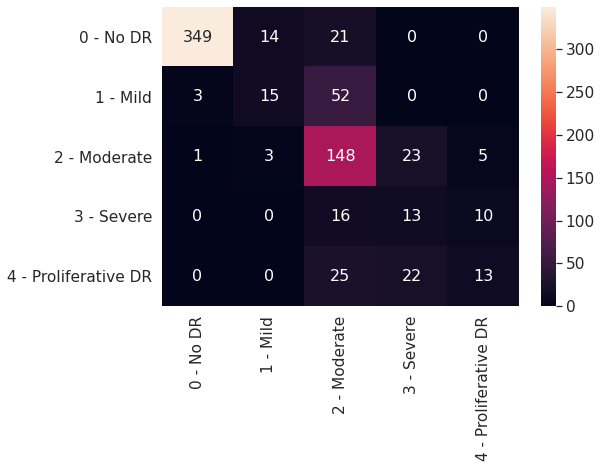

In [87]:
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
plot_conf_matrix(y_val12,test_labels,labels)

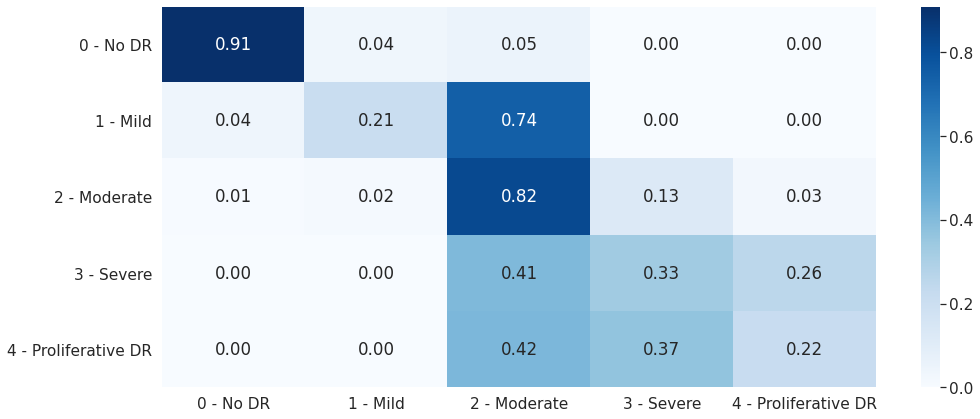

In [88]:
cnf_matrix = confusion_matrix(y_val12, test_labels)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [89]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_labels, y_train12, weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(y_train12,train_labels))

Train Cohen Kappa score: 0.869
Train Accuracy score : 0.763


In [90]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(test_labels, y_val12, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(y_val12,test_labels))

Test Cohen Kappa score: 0.850
Test Accuracy score : 0.734


.904... eyepacs tl, luego aptos ce, bce y ecm

.902 ....eyepacs tl, aptos focales y ecm

.878 eyepacs tl, aptos,messi, idrid ce, bce, ecm 
   
   .850 lo mismo de arriba pero al final solo aptos.



In [ ]:
y_val2 = np.array([[0,0,0,0,0]])


for i in range(1185):
  y_val2 =np.append(y_val2, vdata_gencomplete[i][1], axis=0)

y_val2 = np.delete(y_val2,0, axis=0)



In [ ]:
y_val12 = [np.argmax(pred1) for pred1 in y_val2]

In [ ]:
val_preds = model.predict(vdata_gencomplete,verbose = 1)

1185/1185 [==============================] - 30s 25ms/step


In [ ]:
val_preds1 = [np.argmax(pred) for pred in val_preds]

In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds1, y_val12, weights='quadratic'))

Val Cohen Kappa score: 0.863


.912 ----- primero dataset largo, crosentropy 5 y 75 con aptos

.887 ------ largo, focal 5 y 75 con aptos puede llegar pero se tarda en convergencia

.885 ------- todos, cross, 5 y 75 con aptos, idrid y messidor

.863 -----todos, focal 5 y 75 con aptos, idfrid y messidor

#fold 

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/test.csv')
print('Number of train samples: ', train_df.shape[0])
print('Number of test samples: ', test_df.shape[0])
display(train_df.head())

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for fold_n, (trn_idx, val_idx) in enumerate(folds.split(train_df, train_df['diagnosis'])):
    print('Fold: %s, Train size: %s, Validation size %s' % 
          (fold_n, len(trn_idx), len(val_idx)))
    train_df[('fold_%s' % fold_n)] = 0
    train_df[('fold_%s' % fold_n)].loc[trn_idx] = 'train'
    train_df[('fold_%s' % fold_n)].loc[val_idx] = 'validation'
    
display(train_df.head())

In [ ]:
train_df.to_csv('5-fold.csv', index=False)
train_df.head()

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis2/5-fold.csv')

In [ ]:
train_df.to_csv('/content/gdrive/My Drive/tesis2/5-fold.csv')

In [ ]:
train_df.head(10)

In [ ]:
train_df.info()

In [ ]:
x_train = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')

In [ ]:
plt.imshow(x_train[0])

In [ ]:
train_df['diagnosis']

In [ ]:
fold2=pd.get_dummies(train_df['fold_1']).values

In [ ]:
fold2[0]

In [ ]:
X_train = train_df[train_df['fold_1'] == 'train']
X_val = train_df[train_df['fold_1'] == 'validation']

In [ ]:
X_train[:20]

In [ ]:
y_train1[:20]

In [ ]:
x_train_i =np.array(X_train.index)

In [ ]:
x_val_i = np.array(X_val.index)

In [ ]:
x_train_i

In [ ]:
x_train.shape

In [ ]:
x_val_i.shape

In [ ]:
y_train = pd.get_dummies(train_df['diagnosis']).values

In [ ]:
y_train.shape

In [ ]:
x_train1 = np.empty((2929,224,224,3),dtype='uint8')
x_val1 = np.empty((733,224,224,3),dtype='uint8')

y_train1 =  np.empty((2929,5),dtype='uint8')
y_val1 = np.empty((733,5),dtype='uint8')

for i in range(len(x_train_i)):
  x_train1[i] = x_train[x_train_i[i]]
  y_train1[i] = y_train[x_train_i[i]]

for j in range(len(x_val_i)):
  x_val1[j] = x_train[x_val_i[j]]
  y_val1[j] = y_train[x_val_i[j]]

In [ ]:
y_val1[:20]

In [ ]:
X_val[:20]

In [ ]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

In [ ]:
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [ ]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)
vdata_gen =  test_datagen.flow(x_val1, y_val1, batch_size=BATCH_SIZE, seed=2020)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [ ]:
pip install -U efficientnet

In [ ]:
def cosine_decay_with_warmup(global_step,
                             learning_rate_base,
                             total_steps,
                             warmup_learning_rate=0.0,
                             warmup_steps=0,
                             hold_base_rate_steps=0):
    """
    Cosine decay schedule with warm up period.
    In this schedule, the learning rate grows linearly from warmup_learning_rate
    to learning_rate_base for warmup_steps, then transitions to a cosine decay
    schedule.
    :param global_step {int}: global step.
    :param learning_rate_base {float}: base learning rate.
    :param total_steps {int}: total number of training steps.
    :param warmup_learning_rate {float}: initial learning rate for warm up. (default: {0.0}).
    :param warmup_steps {int}: number of warmup steps. (default: {0}).
    :param hold_base_rate_steps {int}: Optional number of steps to hold base learning rate before decaying. (default: {0}).
    :param global_step {int}: global step.
    :Returns : a float representing learning rate.
    :Raises ValueError: if warmup_learning_rate is larger than learning_rate_base, or if warmup_steps is larger than total_steps.
    """

    if total_steps < warmup_steps:
        raise ValueError('total_steps must be larger or equal to warmup_steps.')
    learning_rate = 0.5 * learning_rate_base * (1 + np.cos(
        np.pi *
        (global_step - warmup_steps - hold_base_rate_steps
         ) / float(total_steps - warmup_steps - hold_base_rate_steps)))
    if hold_base_rate_steps > 0:
        learning_rate = np.where(global_step > warmup_steps + hold_base_rate_steps,
                                 learning_rate, learning_rate_base)
    if warmup_steps > 0:
        if learning_rate_base < warmup_learning_rate:
            raise ValueError('learning_rate_base must be larger or equal to warmup_learning_rate.')
        slope = (learning_rate_base - warmup_learning_rate) / warmup_steps
        warmup_rate = slope * global_step + warmup_learning_rate
        learning_rate = np.where(global_step < warmup_steps, warmup_rate,
                                 learning_rate)
        return np.where(global_step > total_steps, 0.0, learning_rate)

class WarmUpCosineDecayScheduler(Callback):
    """Cosine decay with warmup learning rate scheduler"""

    def __init__(self,
                 learning_rate_base,
                 total_steps,
                 global_step_init=0,
                 warmup_learning_rate=0.0,
                 warmup_steps=0,
                 hold_base_rate_steps=0,
                 verbose=0):
        """
        Constructor for cosine decay with warmup learning rate scheduler.
        :param learning_rate_base {float}: base learning rate.
        :param total_steps {int}: total number of training steps.
        :param global_step_init {int}: initial global step, e.g. from previous checkpoint.
        :param warmup_learning_rate {float}: initial learning rate for warm up. (default: {0.0}).
        :param warmup_steps {int}: number of warmup steps. (default: {0}).
        :param hold_base_rate_steps {int}: Optional number of steps to hold base learning rate before decaying. (default: {0}).
        :param verbose {int}: quiet, 1: update messages. (default: {0}).
        """

        super(WarmUpCosineDecayScheduler, self).__init__()
        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.global_step = global_step_init
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.hold_base_rate_steps = hold_base_rate_steps
        self.verbose = verbose
        self.learning_rates = []

    def on_batch_end(self, batch, logs=None):
        self.global_step = self.global_step + 1
        lr = K.get_value(self.model.optimizer.lr)
        self.learning_rates.append(lr)

    def on_batch_begin(self, batch, logs=None):
        lr = cosine_decay_with_warmup(global_step=self.global_step,
                                      learning_rate_base=self.learning_rate_base,
                                      total_steps=self.total_steps,
                                      warmup_learning_rate=self.warmup_learning_rate,
                                      warmup_steps=self.warmup_steps,
                                      hold_base_rate_steps=self.hold_base_rate_steps)
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nBatch %02d: setting learning rate to %s.' % (self.global_step + 1, lr))

In [ ]:
import efficientnet.keras as efn 

In [ ]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights='imagenet',include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)
    return model

In [ ]:
model = create_model(input_shape=(224, 224, 3), n_out=5)

for layer in model.layers:
    layer.trainable = False

for i in range(-2, 0):
    model.layers[i].trainable = True
model.summary()

In [ ]:
FACTOR = 4
WARMUP_LEARNING_RATE = 1e-3 * FACTOR
STEP_SIZE = len(x_train1) // BATCH_SIZE
WARMUP_EPOCHS = 5
TOTAL_STEPS_1st = WARMUP_EPOCHS * STEP_SIZE
LR_WARMUP_EPOCHS_1st = 2
WARMUP_STEPS_1st = LR_WARMUP_EPOCHS_1st * STEP_SIZE

In [ ]:
cosine_lr_1st = WarmUpCosineDecayScheduler(learning_rate_base=WARMUP_LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_1st,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_1st,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [ ]:
callback_list = [cosine_lr_1st]

In [ ]:
from keras import backend as K

In [ ]:
model.compile(optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE),loss = 'categorical_crossentropy',metrics = ['accuracy'])

history_warmup = model.fit(data_generator,
                                     validation_data=vdata_gen,
                                     epochs=5,
                                     callbacks=callback_list,
                                     verbose=1)

In [ ]:
TOTAL_STEPS_2nd = 20 * STEP_SIZE
LR_WARMUP_EPOCHS_2nd = 5
WARMUP_STEPS_2nd = LR_WARMUP_EPOCHS_2nd * STEP_SIZE
LEARNING_RATE = 0.001

In [ ]:
TOTAL_STEPS_2nd = 20 * STEP_SIZE
LR_WARMUP_EPOCHS_2nd = 5
WARMUP_STEPS_2nd = LR_WARMUP_EPOCHS_2nd * STEP_SIZE
LEARNING_RATE = 0.001

In [ ]:
cosine_lr_2nd = WarmUpCosineDecayScheduler(learning_rate_base=LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_2nd,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_2nd,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [ ]:
for layer in model.layers:
    layer.trainable = True

ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5


es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, cosine_lr_2nd]

optimizer = optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss="categorical_crossentropy",  metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(data_generator, epochs=20, validation_data=vdata_gen,callbacks=[callback_list])

In [ ]:
vdata_gencomplete =  test_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)

In [ ]:
y_val2 = np.array([[0,0,0,0,0]])


for i in range(733):
  y_val2 =np.append(y_val2, vdata_gencomplete[i][1], axis=0)

y_val2 = np.delete(y_val2,0, axis=0)

In [ ]:
y_val12 = [np.argmax(pred1) for pred1 in y_val2]

In [ ]:
val_preds = model.predict(vdata_gencomplete,verbose = 1)

In [ ]:
val_preds1 = [np.argmax(pred) for pred in val_preds]

In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds1, y_val12, weights='quadratic'))

In [ ]:
model.save_weights('/content/gdrive/My Drive/tesis2/effNetB5_fold1.h5')